<a href="https://colab.research.google.com/github/walterbgs/wincademy/blob/main/AssignmentM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


%load_ext google.colab.data_table

In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/walterbgs/wincademy/main/attacks.csv", encoding='ISO-8859-1')
display (df)

In [ ]:

# Rename columns
df.rename(columns={'Fatal (Y/N)': 'Fatal', 'Species ': 'Species'}, inplace=True)

# Drop irrelevant columns/Keep relevant columns
df = df.loc[:, ['Type', 'Activity', 'Name', 'Age', 'Injury', 'Fatal', 'Species']]

# Drop 'empty' rows
df.dropna(how="all", inplace=True)

# Drop rows that are invalid or questionable
# Aanname 1: invalid zijn geen werkelijke haai aanvallen
# Aanname 2: questionable zijn mogelijk geen werkelijke haai aanvallen. Dit betreft een zeer klein aantal dus zal ook weinig bias veroorzaken.
df = df.loc[(df['Type']!='Invalid') & (df['Type']!='Questionable')]

display(df)

In [ ]:
# Function to (easily) replace a value
def replace(df, column, old, new):
  df[column] = df[column].replace({old: new})

**Vraag 1: What are the most dangerous types of sharks to humans?**

In [ ]:

### Fatal kolom ###
# Aanname 1: 'M' is een typfout en met 'N' zijn
# Aanname 2: '2017' moet niet fataal zijn (gebasseerd op Injury kolom)

# Onderzoek Fatal kolom vooraf
print('Before:')
display(df['Fatal'].unique())
display(df.loc[:,'Fatal'].value_counts(dropna=False))

# Clean Fatal kolom
df['Fatal'] = df['Fatal'].str.upper()  # Solve 'y'
df['Fatal'] = df['Fatal'].str.strip()  # Solve ' N' en 'N '
replace(df, 'Fatal', 'UNKNOWN', None)
replace(df, 'Fatal', 'M', 'N')  # (Aanname 1)
replace(df, 'Fatal', '2017', 'N')  # (Aanname 2)
replace(df, 'Fatal', 'N', False)
replace(df, 'Fatal', 'Y', True)

# Cast Fatal kolom naar boolean type
df['Fatal'] = df['Fatal'].astype('boolean')

# Vervang null waarde in Fatal kolom waarbij Injury kolom fataal aangeeft
df.loc[(~df['Injury'].isna()) & (df['Fatal'].isna()) & (df['Injury'].str.lower().str.contains('fatal')),'Fatal'] = True # index 6104 > moet fatal zijn ipv NA!

# Onderzoek Fatal kolom achteraf
print('\nAfter:')
display(df['Fatal'].unique())
display(df.loc[:,'Fatal'].value_counts(dropna=False))

In [ ]:
### Species kolom ###
# Aanname 1: Met een mapping directory zul je niet alle sharktypes eruit filteren. Echter de meest voorkomende (en dus belangrijk voor deze vraag) zullen wel bovenwater komen

# Onderzoek Species kolom
# display(df['Species'].value_counts(dropna=False).head(30))
# display(df['Species'].value_counts(dropna=False).tail(20))

# Clean Species kolom d.m.v. 'mapping directory'
mapping_directory = {'white' : 'White shark', 'hammerhead' : 'Hammerhead shark', 'tiger' : 'Tiger shark', 'bull' : 'Bull shark', 'leucas' : 'Bull shark', 'nurse' : 'Nurse shark', 'lemon' : 'Lemon shark',
                     'reef' : 'Reef shark', 'wobbegong' : 'Wobbegong shark', 'blacktip' : 'Blacktip shark', 'black-tipped' : 'Blacktip shark', 'black tipped' : 'Blacktip shark', 'black finned' : 'Blacktip shark',
                     'blackfin' : 'Blacktip shark', 'dusky' : 'Dusky shark', 'mako' : 'Mako shark', 'blue pointer' : 'Mako shark', 'carpet' : 'Carpet shark', 'blue' : 'Blue shark', 'galapagos' : 'Galapagos shark',
                     'sevengill' : 'Sevengill shark', 'seven-gill' : 'Sevengill shark', 'dog' : 'Dog shark', 'cookiecutter' : 'Cookiecutter shark', 'cookie-cutter' : 'Cookiecutter shark', 'spinner' : 'Spinner shark',
                     'angel' : 'Angel shark', 'silky' : 'Silky shark', 'sandbar' : 'Sandbar shark', 'bronze whaler' : 'Bronze whaler shark', 'sand' : 'Sand shark', 'whale' : 'Whale shark', 'zambesi' : 'Zambezi shark',
                     'zambezi' : 'Zambezi shark', 'c leucas' : 'Zambezi shark', 'porbeagle' : 'Porbeagle', 'foot' : 'Foot shark', 'raggedtooth shark' : 'Ragged-tooth shark', 'goblin' : 'Goblin shark', 'cow' : 'Cow shark',
                     'cat' : 'Catshark', 'salmon' : 'Salmon shark', 'thresher' : 'Thresher shark', 'starry smoothhound' : 'Starry smoothhound shark', 'basking' : 'Basking shark', 'copper' : 'Copper shark',
                     'soupfin' : 'Soupfin shark', 'leopard' : 'Leopard shark', 'silvertip' : 'Silvertip shark', 'port jackson' : 'Port jackson shark', 'horn' : 'Horn shark', 'gummy' : 'Gummy shark',
                     'shovelnose' : 'Shovelnose shark', 'bonita' : 'Bonito shark', 'saw' : 'Sawshark', 'carcharhinid' : 'Requiem shark'}

for x, y in mapping_directory.items():
    df.loc[(df['Species'].str.lower().str.contains(x)) & (~df['Species'].isna()), 'Species2'] = y

# Onderzoek Species2 kolom
display(df['Species2'].value_counts(dropna=False).head(10))

NaN               3834
White shark        644
Tiger shark        251
Bull shark         179
Nurse shark         94
Whale shark         81
Blacktip shark      75
Reef shark          58
Mako shark          53
Blue shark          53
Name: Species2, dtype: int64

Vraag 1: What are the most dangerous types of sharks to humans?



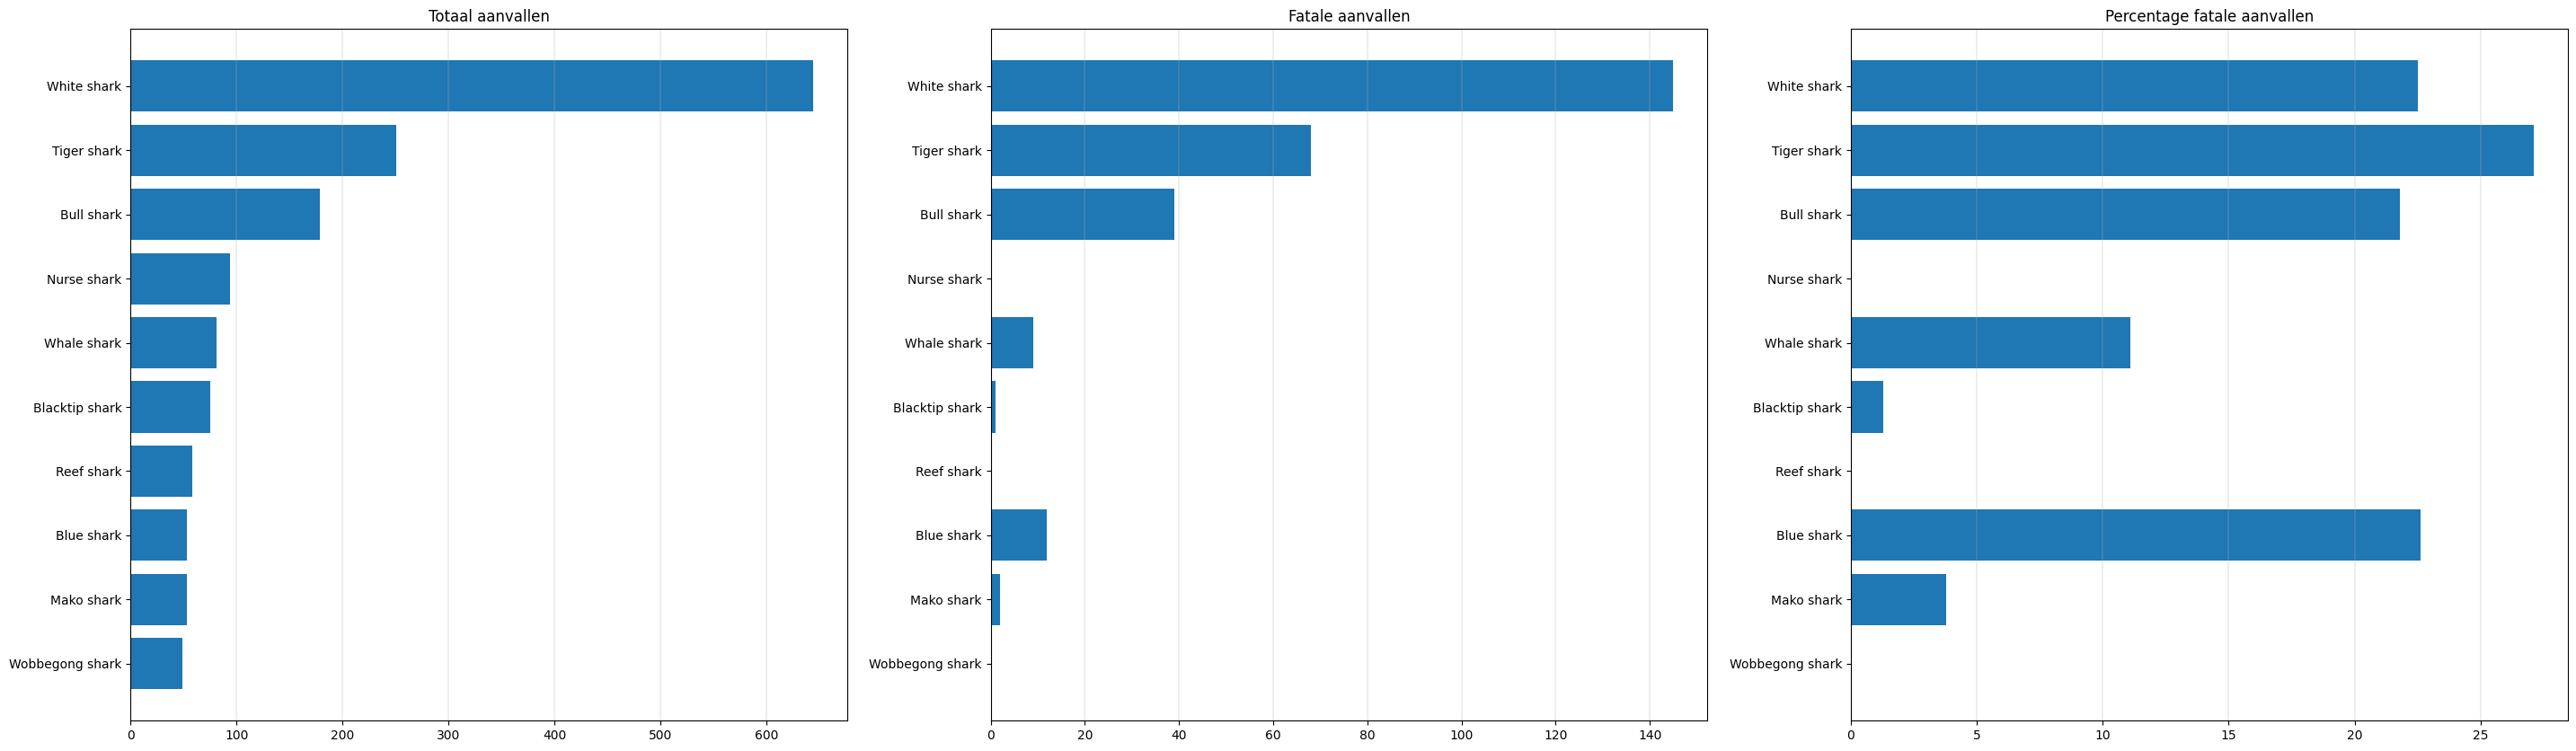


Conclusie:
Als er wordt gekeken naar het totaal aantal aanvallen en het aantal fatale aanvallen dan staat de White shark met stip bovenaan als de gevaarlijkste haai voor mensen (resp. 644 en 145).
Echter als we kijken naar de kans dat een aanval fataal afloopt dan blijkt de Tiger shark het meest gevaarlijk (27%).



In [ ]:
### Beantwoorden van de vraag ###

# Creëren van dataframe met totaal aantal aanvallen per haaiensoort
totals = df['Species2'].value_counts(dropna=True)
totals_sharks = totals.to_frame(name='Total')
totals_sharks.reset_index(inplace=True)
totals_sharks = totals_sharks.rename(columns = {'index':'Species'})
# display(totals_sharks)

# Creëren van een dataframe met aantal fatale aanvallen per sharktype
fatals = df.loc[df['Fatal']==True, 'Species2'].value_counts()
fatals = fatals.to_frame(name='Fatal')
fatals.reset_index(inplace=True)
fatals = fatals.rename(columns = {'index': 'Species'})
# display(fatals)

# Merge (left join) de twee dataframes en selecteer de 10 haaiensoorten met meeste aanvallen
attacks = totals_sharks.merge(fatals, how='left')
attacks['Fatal'] = attacks['Fatal'].replace({np.nan: 0})
attacks = attacks.loc[0:9]

# Creëren van kolom met percentage fatale aanvallen
attacks['Fatal%'] = round(attacks['Fatal'] / attacks['Total'] * 100, 1)
# display(attacks)
# Grafieken maken van de 10 haaiensoorten met meeste aanvallen
sharkspecies = attacks.loc[::-1, 'Species']
totalattacks = attacks.loc[::-1, 'Total']
fatalattacks = attacks.loc[::-1, 'Fatal']
fatalpercentage = attacks.loc[::-1, 'Fatal%']

fig, (ax1, ax2, ax3) = plt.subplots(1,3)
ax1.barh(sharkspecies, totalattacks)
ax2.barh(sharkspecies, fatalattacks)
ax3.barh(sharkspecies, fatalpercentage)

ax1.set_title("Totaal aanvallen")
ax2.set_title("Fatale aanvallen")
ax3.set_title("Percentage fatale aanvallen")

ax1.grid(axis='x', linewidth=0.3)
ax2.grid(axis='x', linewidth=0.3)
ax3.grid(axis='x', linewidth=0.3)

fig.set_size_inches(35,10)

# Antwoord
print('Vraag 1: What are the most dangerous types of sharks to humans?\n')

plt.show()

print("""
Conclusie:
Als er wordt gekeken naar het totaal aantal aanvallen en het aantal fatale aanvallen dan staat de White shark met stip bovenaan als de gevaarlijkste haai voor mensen (resp. 644 en 145).
Echter als we kijken naar de kans dat een aanval fataal afloopt dan blijkt de Tiger shark het meest gevaarlijk (27%).
""")

**Vraag 2: Are children more likely to be attacked by sharks?**

In [ ]:
### Age kolom ###

# Aanname: <12 = kind, 12-18 = tiener, 18-65 = volwassen, >65 = senior
# let op: als de Age bijv 'teen' is dan wordt willekeurig een leeftijd tussen 12 en 18 gegeven zodat deze in de juiste leeftijdscategorie komt
# Let op: als de leeftijd 'or' bevat en beide leeftijden zijn boven of onder een grenswaarde, dan wordt (willekeurig) één van beide waardes gekozen. In andere gevallen is de leeftijdscatogorie onbekend
# Let op: als de leeftijd '&' bevat en beide leeftijden zijn boven of onder een grenswaarde, dan wordt (willekeurig) één van beide waardes gekozen. In andere gevallen is de leeftijdscatogorie meerduidig en wordt dan uitgesloten

# Onderzoek Age kolom
# display(df['Age'].unique())

# Overbodige spaties, 's', apostrofs, haakjes en halven verwijderen:
df['Age'] = df.loc[~(df['Age'].isna()), 'Age'].apply(lambda x: str(x).strip())
df['Age'] = df.loc[~(df['Age'].isna()), 'Age'].apply(lambda x: ' '.join(str(x).split()))
df['Age'] = df.loc[~(df['Age'].isna()), 'Age'].apply(lambda x: str(x).rstrip('s').strip("'").strip('"'). strip('()').rstrip('½'))

# Clean Age kolom d.m.v. 'mapping directory'
mapping_directory_age = {'Teen':16, 'teen': 16, '18 month': 1, '28 & 26': 28,
                         '18 or 20' : 18, '12 or 13': 12, '46 & 34' : 46,
                         '28, 23 & 30' : 23, '36 & 26': 26, '': np.nan,
                         '30 or 36' : 30, '21 & ?' : 21, '33 or 37' : 33,
                         'mid-30': 35, '7 & 31' : np.nan, '20?' : 20,
                         '32 & 30' : 32, 'Elderly' : 65, '21 or 26' : 23,
                         '>50' : 51, '18 to 22' : 18, 'adult' : 18, '9 & 12' : 9,
                         '9 month' : 0, '25 to 35' : 25, '23 & 26' : 23,
                         '33 & 37' : 33, '25 or 28' : 25, '30 & 32' : 30,
                         '50 & 30' : 50, '17 & 35' : np.nan, 'X' : np.nan,
                         'middle-age' : 50, '13 or 18' : 13, '33 & 26' : 33,
                         'MAKE LINE GREEN' : np.nan, '7 or 8' : 7,
                         '17 & 16' : 17, '8 or 10' : 8, 'F' : np.nan,
                         'Both 11' : 11, '9 or 10' : 9, 'young' : 10,
                         '36 & 23' : 36, 'A.M.' : np.nan, '? & 14' : 14,
                         '10 or 12' : 10, '31 or 33' : 31, '13 or 14' : 13}

for x, y in mapping_directory_age.items():
  df.loc[(df['Age']==x), 'Age'] = str(y)

# Cast Age kolom naar floats
df.Age = df.Age.astype('float')

# Leeftijdsgroepering maken
df.loc[(df['Age']<12), 'Age2'] = 'Kind'
df.loc[(df['Age']>=12) & (df['Age']<18), 'Age2'] = 'Tiener'
df.loc[(df['Age']>=18) & (df['Age']<65), 'Age2'] = 'Volwassen'
df.loc[df['Age']>=65, 'Age2'] = 'Senior'

# Resultaat
display(df['Age2'].value_counts(dropna=False))

NaN          2530
Volwassen    2289
Tiener        689
Kind          197
Senior         48
Name: Age2, dtype: int64

In [ ]:
### Antwoord ###
print('Vraag 2: Are children more likely to be attacked by sharks?\n')

print('Aanvallen per leeftijdsgroep')
display(df['Age2'].value_counts(dropna=True))

print("""
Conclusie:
Uit de data blijkt niet dat kinderen meer kans hebben om aangevallen te worden door haaien dan andere leeftijdsgroepen.

Let op: er wordt geen rekening gehouden met het feit dat bepaalde leeftijdsgroepen mogelijk vaker op/rond het water te vinden zijn.
Hierdoor kan het absoluut aantal haai aanvallen bij kinderen laag lijken, maar mogelijk is dit procentueel hoger!""")

Vraag 2: Are children more likely to be attacked by sharks?

Aanvallen per leeftijdsgroep


Volwassen    2289
Tiener        689
Kind          197
Senior         48
Name: Age2, dtype: int64


Conclusie:
Uit de data blijkt niet dat kinderen meer kans hebben om aangevallen te worden door haaien dan andere leeftijdsgroepen. 

Let op: er wordt geen rekening gehouden met het feit dat bepaalde leeftijdsgroepen mogelijk vaker op/rond het water te vinden zijn. 
Hierdoor kan het absoluut aantal haai aanvallen bij kinderen laag lijken, maar mogelijk is dit procentueel hoger!


**Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?**

In [ ]:
### Type kolom ###

# Aanname 1: een haai wordt niet uitgelokt door 'Boating'
# Aanname 2: een haai wordt wel uitgelokt door een 'Sea disaster'
# Aanname 3: indien Injury kolom aangeeft dat aanval provoked was dan wordt deze ook geclassificeerd als provoked (slechts 3 waarnemingen, dus heeft weinig invloed)
# Aanname 4: een aanval wordt als gevaarlijker gezien indien deze fataal is afgelopen

# Onderzoek Type kolom
# display(df['Type'].unique())
# display(df['Type'].value_counts())

# Creëren van Type2 kolom
df['Type2'] = df['Type']

# Clean Type2 kolom
replace(df, 'Type2', 'Boatomg', 'Boating')
replace(df, 'Type2', 'Boat', 'Boating')
replace(df, 'Type2', 'Boating', 'Unprovoked')  # (aanname 1)
replace(df, 'Type2', 'Sea Disaster', 'Provoked')  # (aanname 2)

# Indien Injury kolom aangeeft dat een aanval provoked was, dan wordt Type Provoked (aanname 3)
df.loc[(df['Type']!='Provoked') & (df['Injury'].str.lower().str.contains('provoked')) & (df['Injury'].str.lower().str.contains('unprovoked') == False), 'Type2'] = 'Provoked'


### Antwoord ###

# Bereken percentage fatale afloop voor uitgelokte en niet uitgelokte aanvallen
fatal_provoked = df.loc[(df['Type2']=='Provoked') & (df['Fatal']==True), 'Type2'].count()
total_provoked = df.loc[(df['Type2']=='Provoked') & (~df['Fatal'].isna()), 'Type2'].count()
fatal_provoked_perc = round(fatal_provoked/total_provoked * 100, 1)

fatal_unprovoked = df.loc[(df['Type2']=='Unprovoked') & (df['Fatal']==True), 'Type2'].count()
total_unprovoked = df.loc[(df['Type2']=='Unprovoked') & (~df['Fatal'].isna()), 'Type2'].count()
fatal_unprovoked_perc = round(fatal_unprovoked/total_unprovoked * 100, 1)

# Antwoord
print('Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?\n')

print(f"Een uitgelokte aanval leidde in {fatal_provoked_perc}% van de gevallen tot een fatale afloop\nDe aanvallen die niet uitgelokt werden, leidde in {fatal_unprovoked_perc}% van de gevallen tot een fatale afloop")

print("""
Conclusie:
Uit de data blijkt niet dat een uitgelokte aanval gevaarlijker is.""")

Vraag 3: Are shark attacks where sharks were provoked more or less dangerous?

Een uitgelokte aanval leidde in 23.3% van de gevallen tot een fatale afloop
De aanvallen die niet uitgelokt werden, leidde in 24.5% van de gevallen tot een fatale afloop

Conclusie:
Uit de data blijkt niet dat een uitgelokte aanval gevaarlijker is.


**Vraag 4: Are certain activities more likely to result in a shark attack?**

In [ ]:
### Activity kolom ###

# Aanname 1: activiteiten die 3x of minder voorkomen zullen weinig bijdragen aan het eindantwoord

# Onderzoek Activity kolom
# display(df['Activity'].value_counts().head(60))

# df['Activity2'] = df['Activity']

# Clean Activity kolom d.m.v. 'mapping directory'
mapping_directory_activity = {'surfing' : 'Surfing', 'surf': 'Surfing','swimming' : 'Swimming', 'fishing' : 'Fishing', 'spearfishing' : 'Spearfishing', 'spearing':'Spearfishing', 'bath' : 'Bathing', 'wading' : 'Wading', 'diving' : 'Diving', 'dive' : 'Diving',
                              'standing' : 'Standing', 'snorkeling' : 'Snorkeling', 'snork': 'Snorkeling', 'body boarding':'Body boarding', 'body-boarding':'Body boarding', 'kayaking' : 'Kayaking', 'treading':'Treading water', 'overboard':'Overboard',
                              'boogie': 'Boogie boarding', 'walking':'Walking', 'floating':'Floating', 'canoe' : 'Canoeing', 'rowing':'Rowing', 'sculling':'Rowing', 'paddle boarding': 'Paddle boarding', 'tagging':'Tagging',
                              'kite':'Kite boarding', 'racing': 'Racing', 'Race':'Racing', 'cruising':'Cruising', 'jump': 'Jumping', 'feed':'Feeding', 'shooting':'Shooting', 'washing':'Washing', 'sup':'SUP', 'stand-up paddl':'SUP', 'watch':'Watching',
                              'netting':'Netting', 'play': 'Playing', 'capsized' : 'Capsized', 'murder':'Kill', 'kill':'Kill', 'crab':'crabbing', 'air disaster' : 'Air disaster', 'plane' : 'Air disaster',
                              'air/sea disaster' : 'Air disaster', 'aircraft':'Air disaster', 'sailing' : 'Sailing', 'boating' : 'Boating'}

for x, y in mapping_directory_activity.items():
  df.loc[(df['Activity'].str.lower().str.contains(x) & (~df['Activity'].isna())), 'Activity2'] = y


display(df['Activity2'].value_counts().head(15))



Surfing            1097
Swimming            947
Fishing             656
Diving              515
Spearfishing        358
Bathing             176
Wading              164
Standing            140
Snorkeling           99
Overboard            77
Body boarding        72
Capsized             55
Boogie boarding      49
Floating             46
Treading water       45
Name: Activity2, dtype: int64

Vraag 4: Are certain activities more likely to result in a shark attack?



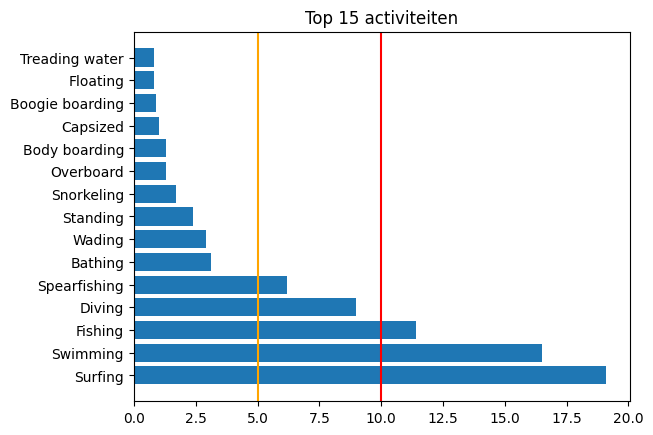


Conclusie:
Gekeken naar het aantal aanvallen per activiteit, blijkt dat enkele activiteiten een stuk vaker voorkomen.
Er zijn drie activiteiten die met kop en schouders er bovenuit steken, namelijk: surven, zwemmen en vissen.
Deze zijn verantwoordelijk voor respectievelijk 19.1%, 16.5% en 11.4% van de aanvallen.
Iets minder frequent, maar nog steeds opvallend, zijn: duiken en speervissen (resp. 9% en 6.2%)

Let op: Er wordt geen rekening gehouden met het feit dat bepaalde activiteiten mogelijk vaker worden uitgevoerd/populairder is.
Hierdoor kan een activiteit absoluut gezien leiden tot veel aanvallen maar procentueel kan dit anders zijn!



In [ ]:

### Antwoord ###

# Resultaat inzichtelijk maken middels horizontale barchart
activities = df['Activity2'].value_counts().head(15).index.tolist()
attacks = np.array(df['Activity2'].value_counts().head(15).tolist())
total = df.shape[0]
attackperc = (attacks / total * 100).round(1)

fig, (ax) = plt.subplots()
ax.barh(activities, attackperc)
plt.axvline(x=5, c='orange')
plt.axvline(x=10, c='r')
ax.set_title('Top 15 activiteiten')

# Antwoord
print('Vraag 4: Are certain activities more likely to result in a shark attack?\n')

plt.show()

print("""
Conclusie:
Gekeken naar het aantal aanvallen per activiteit, blijkt dat enkele activiteiten een stuk vaker voorkomen.
Er zijn drie activiteiten die er met kop en schouders bovenuit steken, namelijk: surfen, zwemmen en vissen.
Deze zijn verantwoordelijk voor respectievelijk 19.1%, 16.5% en 11.4% van de aanvallen.
Iets minder frequent, maar nog steeds opvallend, zijn: duiken en speervissen (resp. 9% en 6.2%)

Let op: Er wordt geen rekening gehouden met het feit dat bepaalde activiteiten mogelijk vaker worden uitgevoerd/populairder is.
Hierdoor kan een activiteit absoluut gezien leiden tot veel aanvallen maar procentueel kan dit anders zijn!
"""
)